# Task 2: Regression with Neural Network

*In this notebook I am going to utilize neural networks to implement a regression analyser for the boston house prices data set.*

---

### Init data

In [1]:
# Load boston housing data
# Create a neural network model
# Train the model
# Evaluate the model's performance
# Predict housing prices based on a feature set

# Import required libraries
import tensorflow as tf
# import boston housing data from keras datasets
from tensorflow.keras.datasets import boston_housing

2023-11-27 13:25:22.584335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


*Load the data*

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(path='boston_housing.npz')

---
### Regression with `MLPRegressor` from scikit-learn

In [86]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

*Regularizing the data for the analysis*

In [87]:
# Regularizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

---
##### NB: The below code has been ran, but was cleared because of a long output trail. The block takes a while to run and the results are posted below, so it is not necessary to run.
---

In [ ]:
# Using GridSearchCV to find a suggestion for the best parameters
parameters = {'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100), (100,)],
                'activation': ['relu', 'tanh', 'logistic'],
                'solver': ['sgd', 'adam', 'lbfgs'],
                'alpha': [1e-4, 1e-3, 1e-2],
                'learning_rate': ['constant', 'adaptive']}
# Create a base model
mlp = MLPRegressor(max_iter=1000)

# Create a grid search model
clf = GridSearchCV(mlp, parameters, n_jobs=-1)

# Train the model
clf.fit(x_train, y_train)

In [15]:
# Do not run - this is reliant on running the previous block. The results are already printed below.
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}


Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}


In [185]:
# Still want to further investigate the best hidden layer architecture
# Finding the best hidden layer size
hidden_layer_sizes = [(50, 25, 10), (70, 35, 15), (60, 30, 25), (300, 150, 60)]

for hidden_layer_size in hidden_layer_sizes:
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_size, max_iter=10000, verbose=False, random_state=42, early_stopping=True, n_iter_no_change=40, learning_rate='constant', solver='sgd', alpha=0.0001)
    mlp.fit(x_train, y_train)
    print(f"Hidden layer size: {hidden_layer_size}")
    print(f"Training score: {mlp.score(x_train, y_train)}")
    print(f"Testing score: {mlp.score(x_test, y_test)}")

Hidden layer size: (50, 25, 10)
Training score: 0.9550741327572323
Testing score: 0.8466909641480038
Hidden layer size: (70, 35, 15)
Training score: 0.9464571570957595
Testing score: 0.8379716415779843
Hidden layer size: (60, 30, 25)
Training score: 0.9554774616234386
Testing score: 0.8294214770237123
Hidden layer size: (300, 150, 60)
Training score: 0.9570423222632015
Testing score: 0.8309533757758228


For this MLPRegressor we are thus using the ReLU rectifier for the activation function - which is the recommended for the hidden layers. In this implementation we are using three hidden layers with 100 neurons in each. The solver is using a SGD (stochastic gradient descent) approach, which means that for the loss function we are calculating the gradient to find the minimum of the loss function by moving in the direction of the steepest descent as defined by the negative of the gradient.

In [186]:
# With some manual testing I found that the la
best_params = {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 25, 10), 'learning_rate': 'constant', 'solver': 'sgd'}

# Create a model with the best parameters
mlp = MLPRegressor(**best_params, max_iter=1000, verbose=False, random_state=42, early_stopping=True, n_iter_no_change=40)

# Train the model
mlp.fit(x_train, y_train)

# Score the model
print(f"Training score: {mlp.score(x_train, y_train)}")
print(f"Testing score: {mlp.score(x_test, y_test)}")

Training score: 0.9550741327572323
Testing score: 0.8466909641480038


In [158]:
# Plot the models guesses vs the actual results
import matplotlib.pyplot as plt
import numpy as np

def display_regression(model, title: str):
    y_pred = model.predict(x_test)

    plt.scatter(y_test, y_pred)
    plt.title(title)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)')
    plt.tight_layout()
    plt.show()

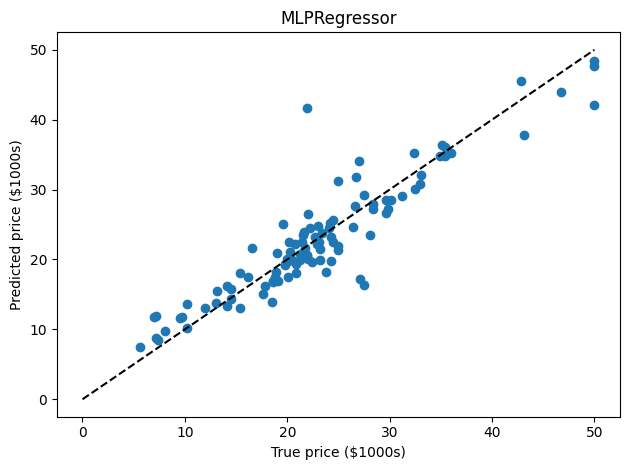

In [187]:
display_regression(mlp, "MLPRegressor")

---
### Regression with `Sequential` from Keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

In [61]:
architectures = [
    [Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(x_train.shape[1],)),
        Dropout(0.5),
        Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'),
        Dropout(0.5),
        Dense(32, kernel_regularizer=regularizers.l1(0.001), activation='relu'),
        Dense(1, activation='linear')
     ],
    # Changed regularizer to l2
    [Dense(128, activation='linear', kernel_regularizer=regularizers.l2(0.001), input_shape=(x_train.shape[1],)),
        Dropout(0.3),
        Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        Dropout(0.3),
        Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        Dense(1, activation='linear')
    ],
    # Changed hidden layer structure
    [Dense(80, activation='linear', kernel_regularizer=regularizers.l2(0.001), input_shape=(x_train.shape[1],)),
        Dropout(0.3),
        Dense(100, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        Dropout(0.3),
        Dense(100, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        Dense(1, activation='linear')
    ],
    # Changed hidden layer structure
    [Dense(80, activation='linear', kernel_regularizer=regularizers.l2(0.001), input_shape=(x_train.shape[1],)),
        Dropout(0.3),
        Dense(100, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        Dropout(0.3),
        Dense(100, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        Dropout(0.3),
        Dense(1, activation='linear')
    ],
]

In [62]:
model = Sequential(architectures[2])

Trying with different implementations, using the mean squared error loss function for the regression with the adam optimizer.

In [63]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 80)                1120      
                                                                 
 dropout_30 (Dropout)        (None, 80)                0         
                                                                 
 dense_57 (Dense)            (None, 100)               8100      
                                                                 
 dropout_31 (Dropout)        (None, 100)               0         
                                                                 
 dense_58 (Dense)            (None, 100)               10100     
                                                                 
 dense_59 (Dense)            (None, 1)                 101       
                                                                 
Total params: 19421 (75.86 KB)
Trainable params: 19421

In [194]:
model.fit(x_train, y_train, epochs=500, batch_size=64, verbose=0, validation_data=(x_test, y_test))

In [195]:
model.evaluate(x_test, y_test, verbose=1)

4/4 [==============================] - 0s 2ms/step - loss: 15.0780 - mse: 14.4703 - mae: 2.5847


[15.07795524597168, 14.47031307220459, 2.5846946239471436]

4/4 [==============================] - 0s 1ms/step


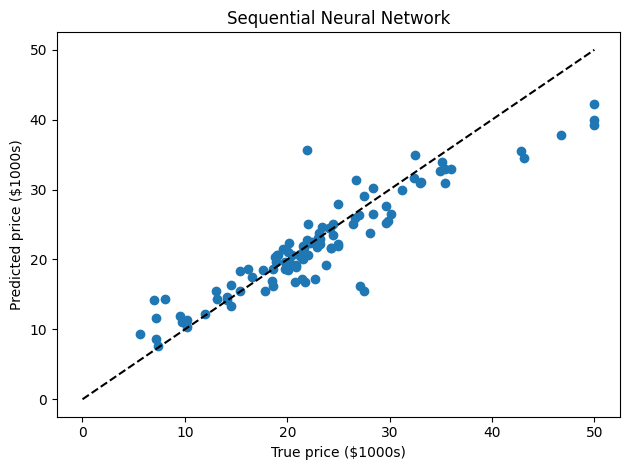

In [196]:
display_regression(model, "Sequential Neural Network")

4/4 [==============================] - 0s 1ms/step


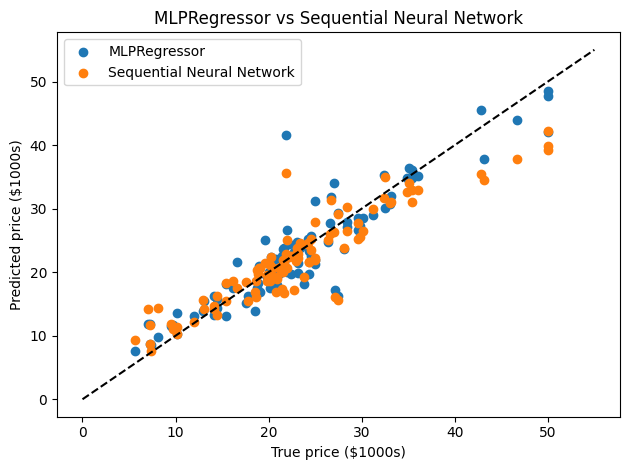

In [197]:
# Display the mlp and sequential neural network side by side
y_pred = mlp.predict(x_test)
y_pred2 = model.predict(x_test)

plt.scatter(y_test, y_pred, label='MLPRegressor')
plt.scatter(y_test, y_pred2, label='Sequential Neural Network')

plt.title("MLPRegressor vs Sequential Neural Network")
plt.plot([0, 55], [0, 55], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.legend()
plt.show()

As you can see by the graph above, we have been able to receive quite similar results from the Sequential Neural Network and the MLPRegressor. The MLPRegressor with it's current settings appears to be more vulnerable to the large deviations, whilst the Sequential appears to in general have more deviations further out than the MLPRegressor.